# Setup

In [36]:
import os
from dotenv import load_dotenv
from PIL import Image, ImageDraw

from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

load_dotenv()

AI_SERVICE_KEY = os.getenv("AI_SERVICE_KEY")
AI_SERVICE_ENDPOINT = os.getenv("AI_SERVICE_ENDPOINT")

In [2]:
cv_client = ImageAnalysisClient(
    endpoint=AI_SERVICE_ENDPOINT,
    credential=AzureKeyCredential(AI_SERVICE_KEY)
)

# Usage

## Image analysis

- Caption: Describes the content of the image.
- Dense caption: Description for up to 10 different regions in the image, including one for the whole image.
- Tags: Content tags for thousands of recognizable objects, living beings, scenery, and actions.
- Objects: Physical object detection.
- People: People detection.
- Smart crops: For thumbnail generation.

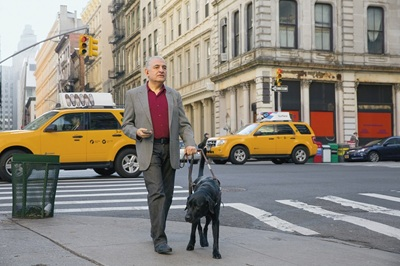

In [78]:
file_name = "data/street.jpg"
img = Image.open(file_name)
img

In [79]:
with open(file_name, "rb") as f:
    image_data = f.read()

result = cv_client.analyze(
    image_data=image_data,
    visual_features=[
        VisualFeatures.CAPTION,
        VisualFeatures.DENSE_CAPTIONS,
        VisualFeatures.TAGS,
        VisualFeatures.OBJECTS,
        VisualFeatures.PEOPLE,
        VisualFeatures.SMART_CROPS
    ],
)

In [80]:
print("Caption:")
print(result.caption)
print()

print("Dense caption:")
print(result.dense_captions)
print()

print("Tags:")
print(result.tags)
print()

print("Objects:")
print(result.objects)
print()

print("People:")
print(result.people)
print()

print("Smart crops:")
print(result.smart_crops)

Caption:
{'text': 'a man walking a dog on a leash', 'confidence': 0.8306515216827393}

Dense caption:
{'values': [{'text': 'a man walking a dog on a leash', 'confidence': 0.8267745971679688, 'boundingBox': {'x': 0, 'y': 0, 'w': 400, 'h': 266}}, {'text': 'a man walking on the street', 'confidence': 0.7348974943161011, 'boundingBox': {'x': 118, 'y': 53, 'w': 78, 'h': 200}}, {'text': 'a yellow car on the street', 'confidence': 0.7879042029380798, 'boundingBox': {'x': 204, 'y': 113, 'w': 114, 'h': 50}}, {'text': 'a yellow car on the street', 'confidence': 0.7660657167434692, 'boundingBox': {'x': 0, 'y': 104, 'w': 137, 'h': 73}}, {'text': 'a green telephone booth with a green sign', 'confidence': 0.6724817752838135, 'boundingBox': {'x': 9, 'y': 150, 'w': 52, 'h': 70}}]}

Tags:
{'values': [{'name': 'outdoor', 'confidence': 0.9985445737838745}, {'name': 'land vehicle', 'confidence': 0.989352822303772}, {'name': 'vehicle', 'confidence': 0.9882503151893616}, {'name': 'building', 'confidence': 0

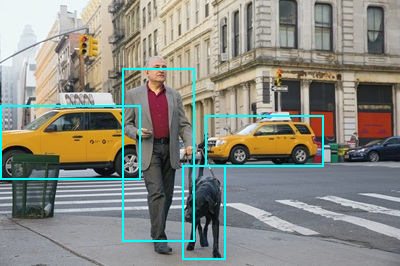

In [81]:
obj_draw = ImageDraw.Draw(Image.open(file_name))

for obj in result.objects.as_dict()["values"]:
    r = obj["boundingBox"]
    bbox = ((r["x"], r["y"]), (r["x"] + r["w"], r["y"] + r["h"])) 
    obj_draw.rectangle(bbox, outline="cyan", width=2)

obj_draw._image

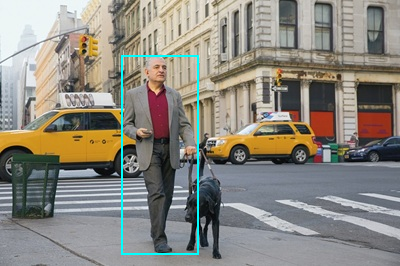

In [82]:
people_draw = ImageDraw.Draw(Image.open(file_name))

for obj in result.people.as_dict()["values"]:
    if obj["confidence"] < 0.8:
        continue
    r = obj["boundingBox"]
    bbox = ((r["x"], r["y"]), (r["x"] + r["w"], r["y"] + r["h"])) 
    people_draw.rectangle(bbox, outline="cyan", width=2)

people_draw._image

## Reading text

Reads and returns result in:
- Text blocks
- Lines
- Text

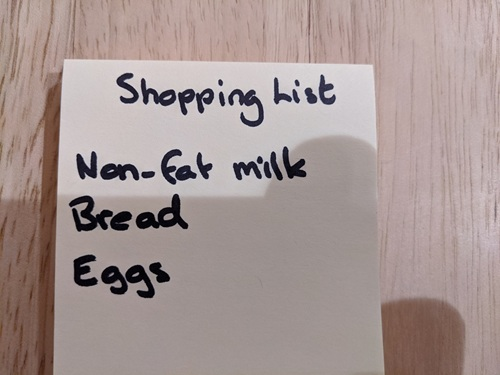

In [83]:
t_file_name = "data/Note.jpg"
t_img = Image.open(t_file_name)
t_img

In [84]:
with open(t_file_name, "rb") as f:
    image_data = f.read()

t_result = cv_client.analyze(
    image_data=image_data,
    visual_features=[
        VisualFeatures.READ,
    ],
)

In [85]:
print("Read result:")
print(t_result.read.as_dict())

Read result:
{'blocks': [{'lines': [{'text': 'Shopping List', 'boundingPolygon': [{'x': 111, 'y': 70}, {'x': 337, 'y': 70}, {'x': 337, 'y': 113}, {'x': 111, 'y': 114}], 'words': [{'text': 'Shopping', 'boundingPolygon': [{'x': 115, 'y': 70}, {'x': 260, 'y': 72}, {'x': 261, 'y': 114}, {'x': 113, 'y': 112}], 'confidence': 0.989}, {'text': 'List', 'boundingPolygon': [{'x': 268, 'y': 72}, {'x': 333, 'y': 71}, {'x': 334, 'y': 111}, {'x': 269, 'y': 114}], 'confidence': 0.889}]}, {'text': 'Non-Fat milk', 'boundingPolygon': [{'x': 72, 'y': 146}, {'x': 307, 'y': 141}, {'x': 308, 'y': 181}, {'x': 72, 'y': 185}], 'words': [{'text': 'Non-Fat', 'boundingPolygon': [{'x': 75, 'y': 148}, {'x': 216, 'y': 144}, {'x': 217, 'y': 184}, {'x': 73, 'y': 185}], 'confidence': 0.756}, {'text': 'milk', 'boundingPolygon': [{'x': 236, 'y': 143}, {'x': 304, 'y': 142}, {'x': 306, 'y': 182}, {'x': 236, 'y': 184}], 'confidence': 0.992}]}, {'text': 'Bread', 'boundingPolygon': [{'x': 67, 'y': 194}, {'x': 189, 'y': 193}, {

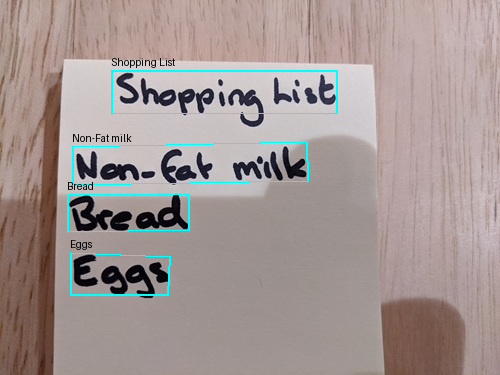

In [87]:
t_draw = ImageDraw.Draw(Image.open(t_file_name))

for line in t_result.read.as_dict()["blocks"][0]["lines"]:
    polygon_bbox = [(c["x"], c["y"]) for c in line["boundingPolygon"]]
    t_draw.polygon(polygon_bbox, outline="cyan", width=2)
    t_draw.text((polygon_bbox[0][0], polygon_bbox[0][1]-14), text=line["text"], fill="black")

t_draw._image